![](https://img1.picmix.com/output/stamp/normal/9/4/7/3/1953749_59e4e.png)

# Analysis On The Top Ranked Bollywood Celebrities

Bollywood is the Hindi film industry based in Mumbai, India. It is the largest film industry in the world in terms of the number of films produced and the number of people employed.In this analysis, I will explore the Bollywood Actors Ranking dataset through visualizations and graphs using matplotlib and seaborn.

## Package Install and Import
First, we will install and import necessary packages.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
project_name = "analysis-on-the-top-ranked-bollywood-celebrities"

In [ ]:
jovian.commit(files=['BollywoodActorRanking.csv','BollywoodMovieDetail.csv'],project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities" on https://jovian.com
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities


'https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities'

## Loading the Dataset

We are now prepared to load the dataset, which we will accomplish by utilizing the standard "read_csv" function from the Pandas library. Let us have a quick look at the data to get an idea of its appearance.

In [ ]:
Bollywood_df = pd.read_csv('BollywoodActorRanking.csv')
Bollywood_df.head(10)

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716
5,378,Hrithik Roshan,16,1120,5.89130,2650000,7.83298,8.25194
6,379,Priyanka Chopra,36,1990,4.45109,3130000,9.07128,8.13686
7,380,Kareena Kapoor,37,2200,4.86016,2940000,8.58112,8.09065
8,381,Ranbir Kapoor,11,890,6.95850,1860000,5.79496,7.69864
9,382,Kajol,6,450,6.38043,1780000,5.58858,7.25156


After a quick look at the dataset, it looks like a typical celebrity performance dataset with ratings and ranks between the year  2001 and 2014.

## Data Preparation and Cleaning

In [ ]:
Bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   actorId               301 non-null    int64  
 1   actorName             301 non-null    object 
 2   movieCount            301 non-null    int64  
 3   ratingSum             301 non-null    int64  
 4   normalizedMovieRank   301 non-null    float64
 5   googleHits            301 non-null    int64  
 6   normalizedGoogleRank  189 non-null    float64
 7   normalizedRating      301 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 18.9+ KB


There are 301 entries and 8 columns to work with. As we can see , there is a columns that contain null values 
('normalizedGoogleRank').

In [ ]:
Bollywood_df.nunique()

actorId                 301
actorName               301
movieCount               36
ratingSum                96
normalizedMovieRank     157
googleHits              178
normalizedGoogleRank    177
normalizedRating        224
dtype: int64

## Handling Null Values
We can see that for each of the columns, there are some different unique values for some of them. It makes sense that actorId contains 301 distinct values, since it is a unique key used to identify an actor.

In [ ]:
Bollywood_df.isnull().values.any()

True

In [ ]:
Bollywood_df.isnull().sum().sum()

112

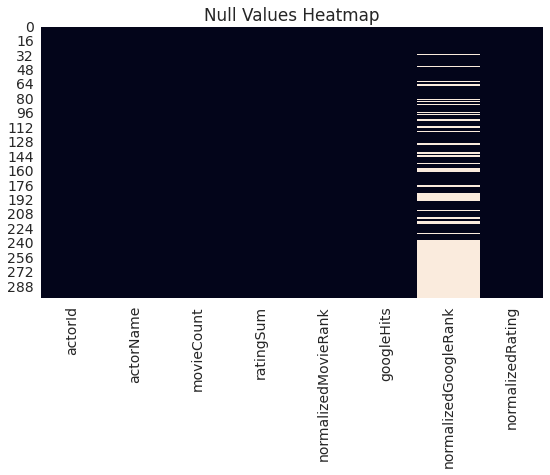

In [ ]:
sns.heatmap(Bollywood_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

As it is evident from the heatmap above,there are a lot of null values present in normalizedGoogleRank .Let us see the specifications of these parameters.

In [ ]:
Bollywood_df.isnull().sum()

actorId                   0
actorName                 0
movieCount                0
ratingSum                 0
normalizedMovieRank       0
googleHits                0
normalizedGoogleRank    112
normalizedRating          0
dtype: int64

As stated in the table, we can see that there are quite a few null values in the dataset. There are a total of 112 null values  missing points under 'normalizedGoogleRank' . We will have to handle all null data points before we move further.

For null values, the easiest way to get rid of them is to delete the columns with the missing data and as we had another ranking parameter known as delete "normalizedMovieRank",we afford to delete the "normalizedGoogleRank" column.

In [ ]:
Bollywood_df = Bollywood_df.drop('normalizedGoogleRank', axis=1)

In [ ]:
Bollywood_df.isnull().any()

actorId                False
actorName              False
movieCount             False
ratingSum              False
normalizedMovieRank    False
googleHits             False
normalizedRating       False
dtype: bool

In [ ]:
Bollywood_df.head(10)

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.62716
5,378,Hrithik Roshan,16,1120,5.89130,2650000,8.25194
6,379,Priyanka Chopra,36,1990,4.45109,3130000,8.13686
7,380,Kareena Kapoor,37,2200,4.86016,2940000,8.09065
8,381,Ranbir Kapoor,11,890,6.95850,1860000,7.69864
9,382,Kajol,6,450,6.38043,1780000,7.25156


## Adding another dataset
we will be casually using the Bollywood Movie Detail dataset which contain very useful data about the movies which these actors were as cast.The hitFlop column contains values from 1 to 9 with

1 - Disaster 2 - Flop 3 - Below Average 4 - Average 5 - Semi Hit 6 - Hit 7 - Super Hit 8 - Blockbuster 9 - All-Time Blockbuster.

The following dataset is much bigger than the first dataset. So,let us give it a look.

In [ ]:
movies_df=pd.read_csv("BollywoodMovieDetail.csv")

In [ ]:
movies_df.head(10)

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1
5,tt0238936,Devdas,2002,12 Jul 2002,Musical | Romance,Saratchandra Chatterjee (based on the novel by...,Shah Rukh Khan | Madhuri Dixit | Aishwarya Rai...,Sanjay Leela Bhansali,0.0,6
6,tt0247911,Aap Mujhe Achche Lagne Lage,2002,19 Apr 2002,Action | Drama | Romance,Robin Bhatt (story) | Girish Dhamija (dialogue...,Hrithik Roshan | Ameesha Patel | Kiran Kumar |...,Vikram Bhatt,0.0,2
7,tt0248126,Kabhi Khushi Kabhie Gham...,2001,14 Dec 2001,Drama | Musical | Romance,Karan Johar | Sheena Parikh (screenplay),Amitabh Bachchan | Jaya Bhaduri | Shah Rukh Kh...,Karan Johar,0.0,8
8,tt0248216,Na Tum Jaano Na Hum,2002,10 May 2002,Comedy | Drama | Musical,Pratibha Acharya (dialogue) | Arjun Sablok,Saif Ali Khan | Hrithik Roshan | Esha Deol | A...,Arjun Sablok,0.0,1
9,tt0248617,Yaadein...,2001,27 Jun 2001,Musical | Drama | Romance,Subhash Ghai (dialogue) | Subhash Ghai (screen...,Jackie Shroff | Hrithik Roshan | Kareena Kapoo...,Subhash Ghai,0.0,2


## Handling Null Values For This Dataset

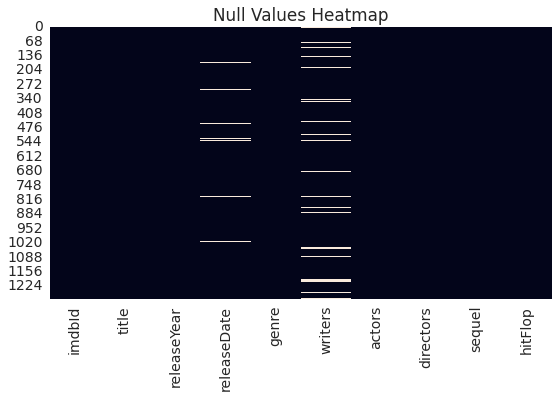

In [ ]:
sns.heatmap(movies_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [ ]:
movies_df.isnull().sum()

imdbId           0
title            0
releaseYear      0
releaseDate     53
genre            2
writers        119
actors           3
directors        4
sequel           3
hitFlop          0
dtype: int64

Above in the heatmap and table, we can see that there are quite a few null values in the dataset. so,we are required to handle these as well and to do so we will be deleting the rows with null values and for string parameters we will be replacing it with "no-columnName" .

In [ ]:
movies_df['directors'].fillna('No Director', inplace=True)
movies_df['actors'].fillna('No actors', inplace=True)
movies_df['genre'].fillna('genre', inplace=True)
movies_df['writers'].fillna('No writers', inplace=True)
movies_df.dropna(subset=['releaseDate','sequel'],inplace=True)

In [ ]:
movies_df.isnull().any()

imdbId         False
title          False
releaseYear    False
releaseDate    False
genre          False
writers        False
actors         False
directors      False
sequel         False
hitFlop        False
dtype: bool

Let us save our work before moving further.

In [ ]:
import jovian

In [ ]:
jovian.commit(files=['BollywoodActorRanking.csv','BollywoodMovieDetail.csv'],project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities" on https://jovian.com
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities


'https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities'

## Exploratory Analysis and Visualization

First we will begin analysis on the first dataset. Revisiting the data, let us see how it looked like again.



In [ ]:
Bollywood_df

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.62716
...,...,...,...,...,...,...,...
296,669,Achint Kaur,4,80,1.00000,0,1.00000
297,670,Yuvika Chaudhry,5,100,1.00000,0,1.00000
298,671,Pankaj Berry,5,100,1.00000,0,1.00000
299,672,Varun Dhawan,0,0,80.00000,0,4.74000


Let us sort actors according to movies count and look at the top 10 actors that have produced most films.

In [ ]:
Bollywood_df.sort_values('movieCount', ascending=False).head(10)

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedRating
18,391,Akshay Kumar,54,2950,4.38768,1960000,6.38048
14,387,Ajay Devgn,49,2320,3.67524,2570000,6.87132
11,384,Amitabh Bachchan,48,2140,3.40489,2770000,7.01130
36,409,Sanjay Dutt,43,1740,3.00202,1560000,5.00264
83,456,Sunil Shetty,42,1530,2.60714,560000,3.30729
7,380,Kareena Kapoor,37,2200,4.86016,2940000,8.09065
2,375,Salman Khan,36,2340,5.40217,3490000,9.20821
77,450,Anupam Kher,36,1310,2.60326,657000,3.44770
6,379,Priyanka Chopra,36,1990,4.45109,3130000,8.13686
42,415,Bipasha Basu,34,1570,3.56074,1050000,4.57122


This data looks interesting,Let us plot a bar graph for each actors and the movie count.

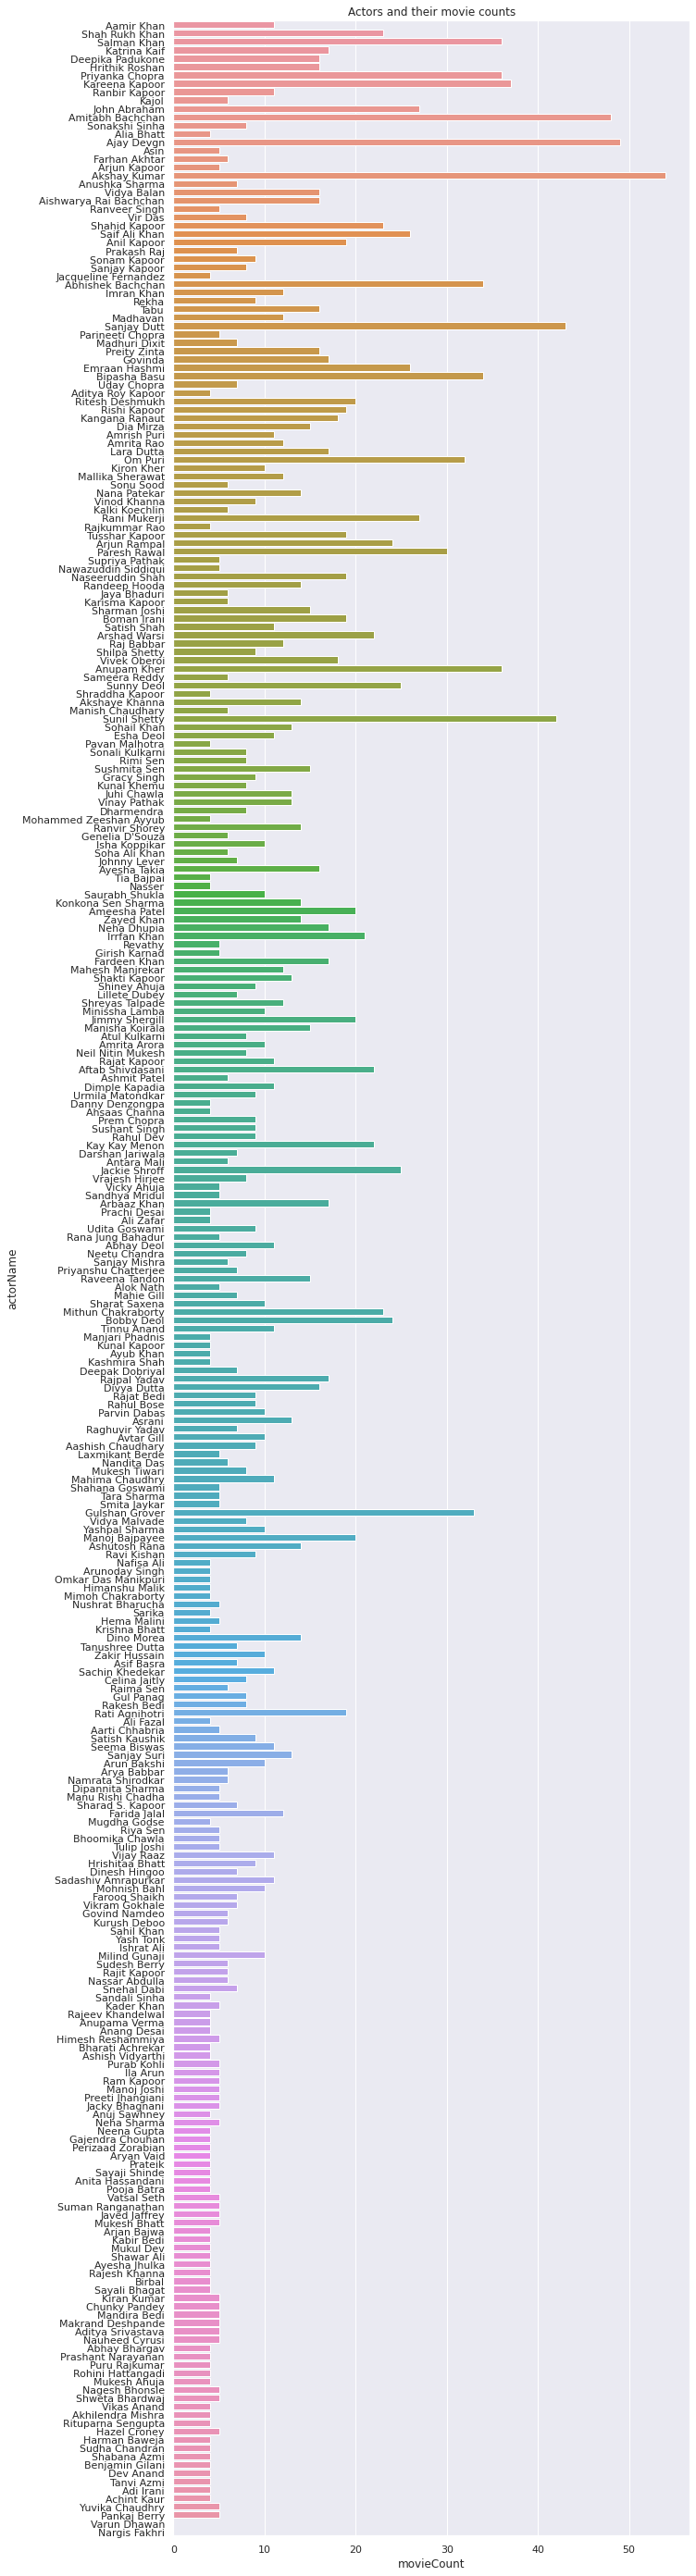

In [ ]:
sns.set(rc={'figure.figsize':(10,50)})
sns.barplot(x='movieCount', y='actorName', data=Bollywood_df).set(title="Actors and their movie counts");

Since this bar graph is too big, we extract a smaller part of the dataset. Let us take the top 50 for instance.

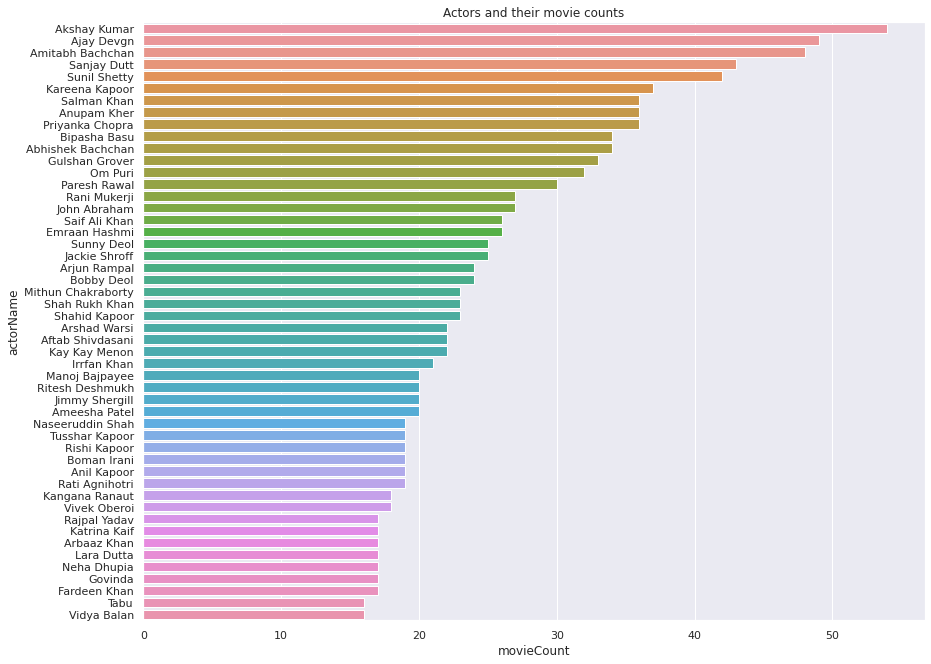

In [ ]:
sns.set(rc={'figure.figsize':(14,11)})
sns.barplot(x='movieCount', y='actorName', data=Bollywood_df.sort_values('movieCount', ascending=False).head(50)).set(title="Actors and their movie counts");

Let us now plot the actors according to rating but for a subset of top 50 actors.

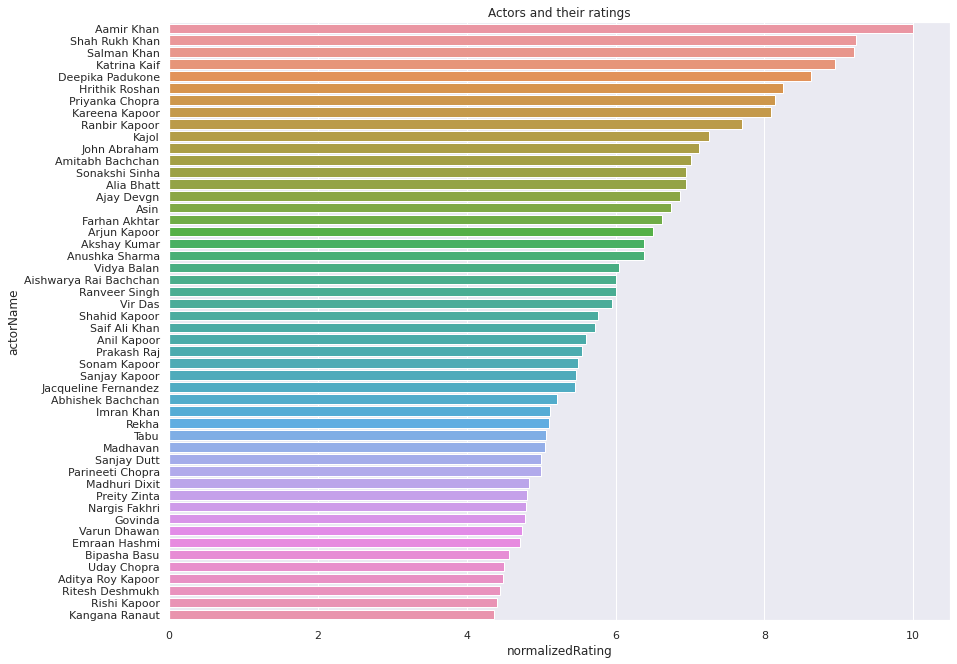

In [ ]:
sns.set(rc={'figure.figsize':(14,11)})
sns.barplot(x='normalizedRating', y='actorName', data=Bollywood_df.sort_values('normalizedRating', ascending=False).head(50)).set(title="Actors and their ratings");

Let us now draw a histogram of number of normalized Rating made of the actors.

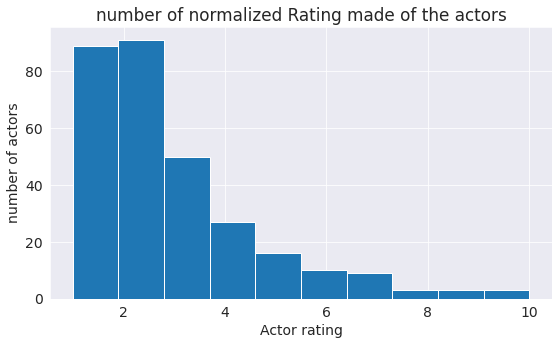

In [ ]:
plt.title('number of normalized Rating made of the actors')
plt.xlabel('Actor rating')
plt.ylabel('number of actors')
plt.hist(Bollywood_df.normalizedRating);

This histogram implies that only a few actors were given the rating between 8 and 10 whereas a majority of the actors come in the range between 1 to 4.

## Let us now use the second dataset

Let us revisit it

In [ ]:
movies_df

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,No writers,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1279,tt4121522,Shuruaat Ka Interval,2014,15 Aug 2014,genre,Aarti S. Bagdi | Amrit Raj Gupta | Krishan Hoo...,Kaivalya Chheda | Rajsekhar Aningi | Avidant B...,Aarti S. Bagdi | Amrit Raj Gupta | Krishan Hoo...,0.0,1
1280,tt4187650,Trip to Bhangarh,2014,28 Aug 2014,Horror,No writers,Manish Choudhary | Suzanna Mukherjee | Poonam ...,Jitendra Pawar,0.0,1
1281,tt4190220,Zed Plus,2014,28 Nov 2014,genre,Chandra Prakash Dwivedi (screen play and dialo...,Adil Hussain | Ekavali Khanna | Kulbhushan Kha...,Chandra Prakash Dwivedi,0.0,1
1282,tt4219300,Gollu aur Pappu,2014,21 Nov 2014,Comedy,No writers,Vir Das | Sandeepa Dhar | Rahul Handa | Dimple...,Kabir Sadanand,0.0,1


Here,Let us plot a scatter plot for hitflop parameter. remember, the hitFlop column value means

1 - Disaster 2 - Flop 3 - Below Average 4 - Average 5 - Semi Hit 6 - Hit 7 - Super Hit 8 - Blockbuster 9 - All-Time Blockbuster.


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


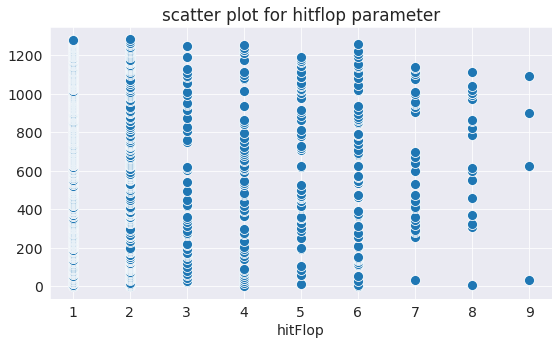

In [ ]:
sns.scatterplot(movies_df.hitFlop, movies_df.index,s=100).set(title="scatter plot for hitflop parameter");

As we can see from the above scatter plot, majority of films are rated between 1 and 4, a moderate amount of films are rated between 5 and 7 and only a very few films can qualify the 8 & 9 mark with 9 only containing a countable 4 films which just shows how hard is to be an all time blockbuster film.

Plotting top 50 movies according to the hitflop rating parameter.

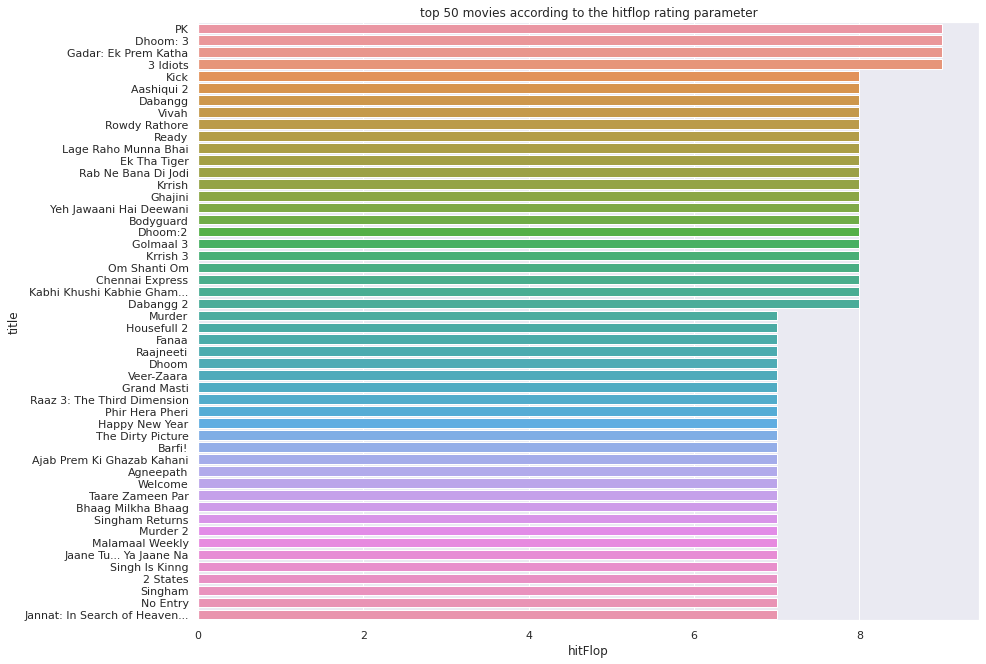

In [ ]:
sns.set(rc={'figure.figsize':(14,11)})
sns.barplot(x='hitFlop', y='title', data=movies_df.sort_values('hitFlop', ascending=False).head(50)).set(title="top 50 movies according to the hitflop rating parameter");

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit(files=['BollywoodActorRanking.csv','BollywoodMovieDetail.csv'],project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities" on https://jovian.com
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities


'https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities'

## Asking and Answering Questions

#### Q1: Which actor has the most google hits ?
(google hits are the number of google searches for that actor)

Let us first look at a scatter plot of all data available for google hits to see the  trend.

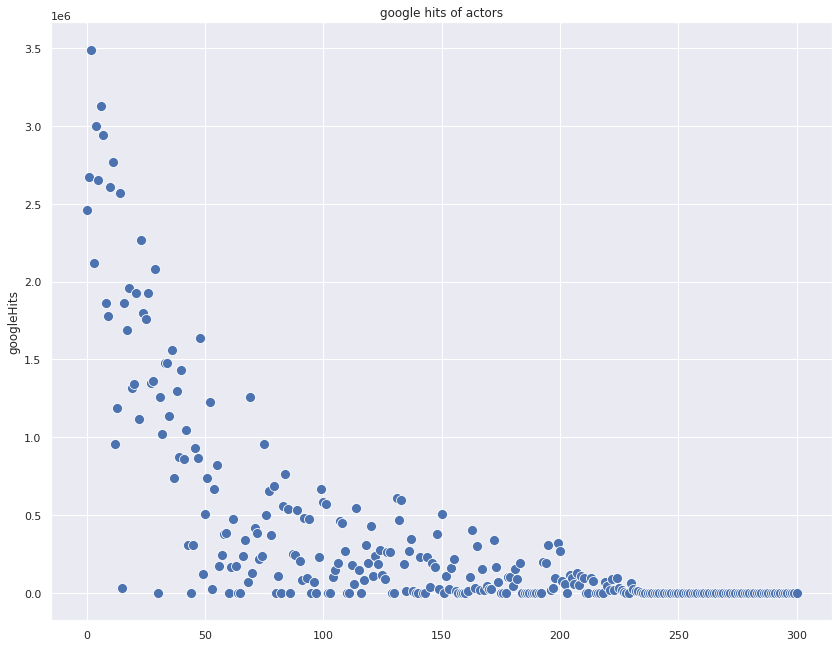

In [ ]:
sns.scatterplot(x=Bollywood_df.index, y=Bollywood_df.googleHits, s=100).set(title="google hits of actors");

As stated above, there are only a few actors that come close to 3.5*10^6 google hits.
we can see a cluster of values lying in the range of 0 to 1.5*10^6 and lastly at the far right , we can see there are a lot of values for 0.0. Now that we have looked upon the trend,Let us see,which actor is leading in this criteria.

In [ ]:
Bollywood_df.max().googleHits

3490000

dataframe.max().column_name function is used to retrieve the max value from column value which we now use for querying the dataframe.

In [ ]:
name=Bollywood_df[Bollywood_df.googleHits == Bollywood_df.max().googleHits].iat[0,1]

In [ ]:
print('The actor with the most google hits is {}.'.format(name))

The actor with the most google hits is Salman Khan.


#### Q2: list of top 10 actors with least or no films?

In [ ]:
Bollywood_df.sort_values('movieCount', ascending=True)

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedRating
300,673,Nargis Fakhri,0,0,NaN,0,4.80000
299,672,Varun Dhawan,0,0,NaN,0,4.74000
242,615,Bharati Achrekar,4,120,1.97826,0,1.55754
243,616,Ashish Vidyarthi,4,120,1.97826,0,1.55754
86,459,Pavan Malhotra,4,240,4.91304,0,3.23016
...,...,...,...,...,...,...,...
83,456,Sunil Shetty,42,1530,2.60714,560000,3.30729
36,409,Sanjay Dutt,43,1740,3.00202,1560000,5.00264
11,384,Amitabh Bachchan,48,2140,3.40489,2770000,7.01130
14,387,Ajay Devgn,49,2320,3.67524,2570000,6.87132


As asked in the question, let us get the top 10 of the list by the use of .head() function

In [ ]:
Bollywood_df.sort_values('movieCount', ascending=True).head(10)

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedRating
300,673,Nargis Fakhri,0,0,NaN,0,4.80000
299,672,Varun Dhawan,0,0,NaN,0,4.74000
242,615,Bharati Achrekar,4,120,1.97826,0,1.55754
243,616,Ashish Vidyarthi,4,120,1.97826,0,1.55754
86,459,Pavan Malhotra,4,240,4.91304,0,3.23016
80,453,Shraddha Kapoor,4,250,5.15761,0,3.36954
250,623,Anuj Sawhney,4,110,1.73370,0,1.41815
252,625,Neena Gupta,4,100,1.48913,0,1.27877
253,626,Gajendra Chouhan,4,100,1.48913,0,1.27877
254,627,Perizaad Zorabian,4,100,1.48913,0,1.27877


Let us acquire the number of distinct movie count for the table , if the number is too small there is no point in visualizing it.

In [ ]:
Bollywood_df.sort_values('movieCount', ascending=True).head(10).movieCount.nunique()

2

Now , It would be a great idea to plot these actors with respect to their normalized Rating and setting moviecount as hue for getting better insights.

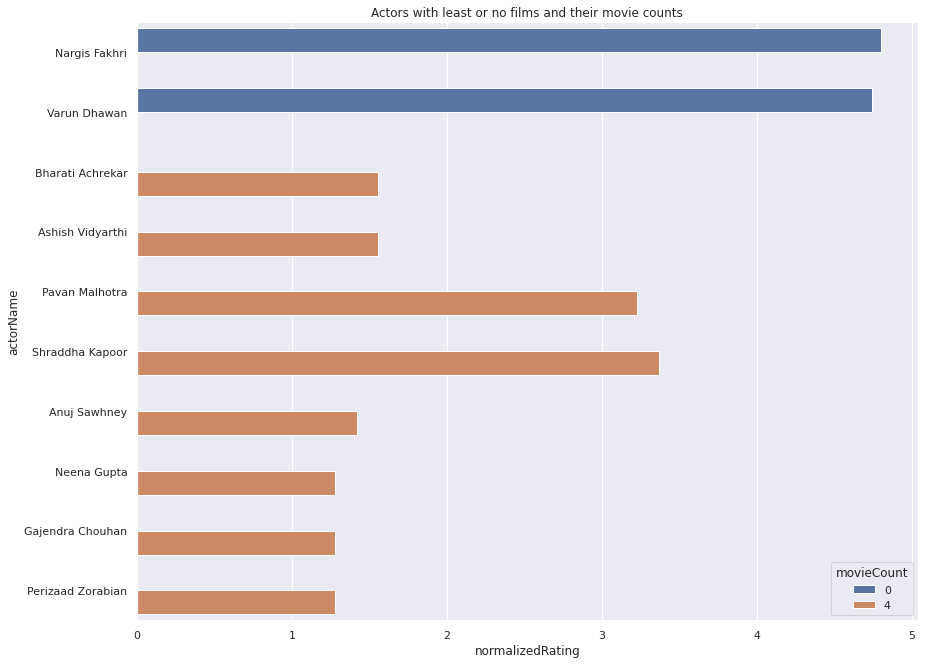

In [ ]:
sns.barplot(x='normalizedRating', y='actorName', hue='movieCount', data=Bollywood_df.sort_values('movieCount', ascending=True).head(10)).set(title="Actors with least or no films and their movie counts");

Now,let us also retrieve the actors name as a normal python list which may come in handy in further analysis.

In [ ]:
answer2 = (Bollywood_df.sort_values('movieCount', ascending=True).head(10).actorName).tolist()

In [ ]:
print(answer2)

['Nargis Fakhri', 'Varun Dhawan', 'Bharati Achrekar', 'Ashish Vidyarthi', 'Pavan Malhotra', 'Shraddha Kapoor', 'Anuj Sawhney', 'Neena Gupta', 'Gajendra Chouhan', 'Perizaad Zorabian']


#### Q3: What are the top 10 most popular genre in bollywood movies ?

Let us retrieve the unique genre types and their respective film count .

In [ ]:
labels = movies_df['genre'].value_counts()[:10].index.tolist()

In [ ]:
data = movies_df['genre'].value_counts()[:10].tolist()

The best way to represent the data would be with the help of a pie chart that will clearly tell us about its distribution.

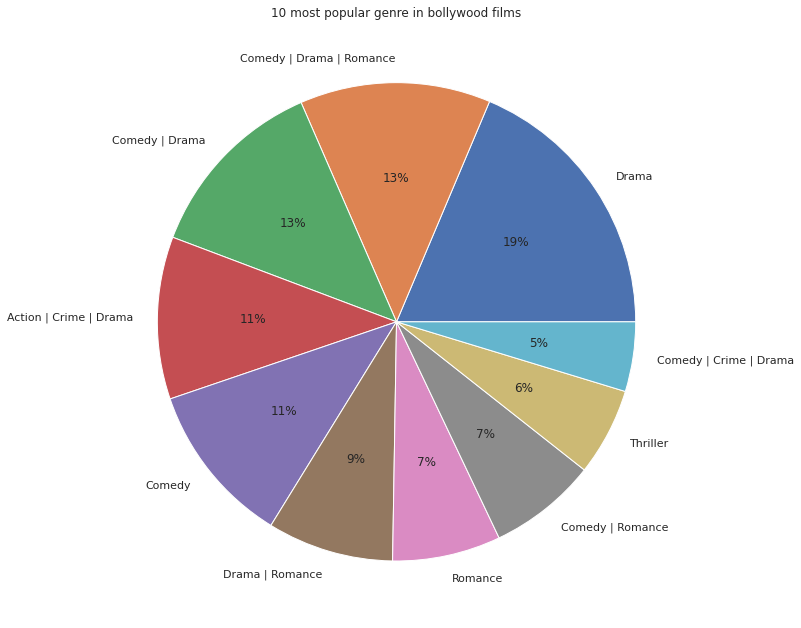

In [ ]:
plt.title("10 most popular genre in bollywood films")
plt.pie(data, labels = labels, autopct='%.0f%%');

As it is evident from the above pie chart , Drama is the most popular genre of bollywood films followed by composite of comedy|drama|romance and comedy|drama films.

#### Q4: How many films have at least one sequel and how did the sequels performed on theatres?

In [ ]:
movies_df[movies_df.sequel!=0]

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
118,tt0337633,Hathyar: Face to Face with Reality,2002,18 Oct 2002,Action | Thriller | Crime,Praveen Bhardwaj (lyrics) | Dev Kohli (lyrics)...,Sanjay Dutt | Shilpa Shetty | Sharad S. Kapoor...,Mahesh Manjrekar,1.0,2
220,tt0383719,Xcuse Me,2003,26 Sep 2003,Comedy,No writers,Sharman Joshi | Sahil Khan | Anil Chaudhary | ...,N. Chandra,1.0,1
283,tt0419058,Phir Hera Pheri,2006,09 Jun 2006,Comedy | Crime,Neeraj Vora,Akshay Kumar | Sunil Shetty | Paresh Rawal | B...,Neeraj Vora,1.0,7
307,tt0432637,Krrish,2006,23 Jun 2006,Action | Adventure | Romance,Robin Bhatt (screenplay) | Sachin Bhowmick (sc...,Rekha | Hrithik Roshan | Priyanka Chopra | Sha...,Rakesh Roshan,1.0,8
324,tt0441048,Dhoom:2,2006,24 Nov 2006,Action | Thriller,Vijay Krishna Acharya (screenplay) | Vijay Kri...,Abhishek Bachchan | Uday Chopra | Hrithik Rosh...,Sanjay Gadhvi,1.0,8
371,tt0456144,Lage Raho Munna Bhai,2006,01 Sep 2006,Comedy | Drama | Romance,Vidhu Vinod Chopra (screenplay) | Rajkumar Hir...,Sanjay Dutt | Arshad Warsi | Vidya Balan | Bom...,Rajkumar Hirani,1.0,8
390,tt0461936,Don,2006,20 Oct 2006,Action | Crime | Thriller,Salim Khan (based on an original screenplay by...,Shah Rukh Khan | Priyanka Chopra | Arjun Rampa...,Farhan Akhtar,1.0,6
451,tt0490210,Sarkar Raj,2008,06 Jun 2008,Action | Crime | Drama,Prashant Pandey,Amitabh Bachchan | Abhishek Bachchan | Aishwar...,Ram Gopal Varma,1.0,3
555,tt1029231,Krrish 3,2013,01 Nov 2013,Action | Sci-Fi,Rakesh Roshan (story) | Robin Bhatt (screenpla...,Hrithik Roshan | Amitabh Bachchan | Priyanka C...,Rakesh Roshan,1.0,8
574,tt1092005,Golmaal Returns,2008,29 Oct 2008,Comedy | Crime | Drama,Indie (lyrics) | Rumi Jaffery | Ashiesh Pandit...,Amrita Arora | Leigh Barwell | Robin Bhatt | A...,Rohit Shetty,1.0,6


Let us plot these movies with their respective hitFlop rating to infer how did they perform on box office.

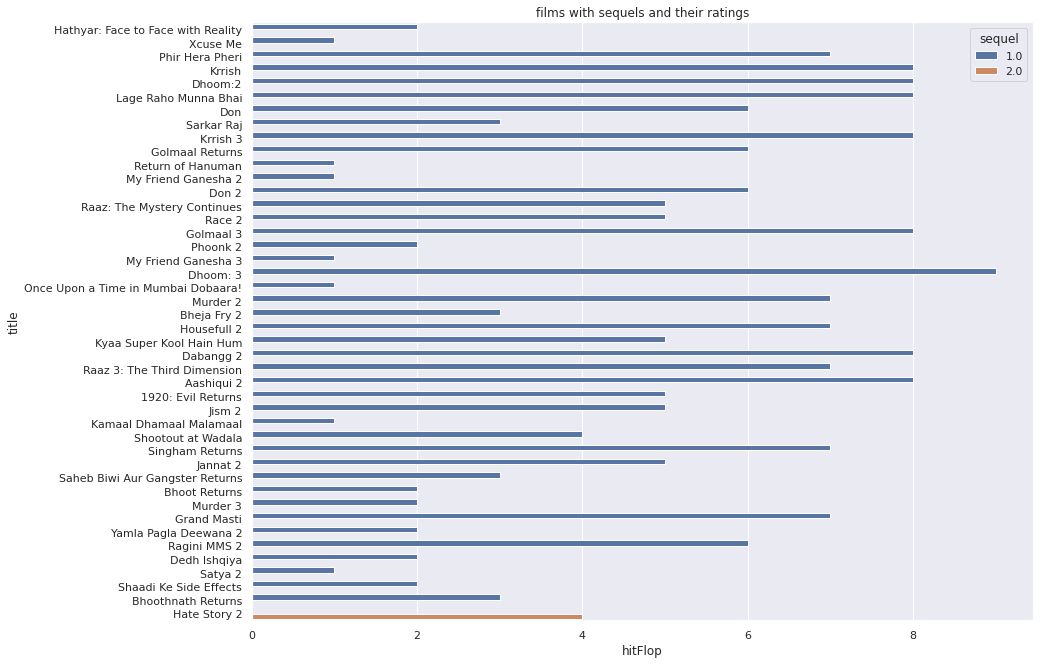

In [ ]:
sns.barplot(x ='hitFlop', y ='title',hue='sequel', data=movies_df[movies_df.sequel!=0]).set(title="films with sequels and their ratings");

As stated in the above bar graph,Dhoom 3 performed the best out of all movies with a hitFlop rating of 9 which means it was an all time blockbuster. note that we used sequel as hue and we can see there are only  2 distinct values 1,2. Now,let us also give the total number of films with a sequel.

In [ ]:
len(movies_df[movies_df.sequel!=0])

44

In [ ]:
print('There are {} films which have at least one sequel.'.format(len(movies_df[movies_df.sequel!=0])))

There are 44 films which have at least one sequel.


#### Q5: Which director or directors have an All time block buster?

In [ ]:
movies_df[movies_df.hitFlop==9]

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
32,tt0284137,Gadar: Ek Prem Katha,2001,15 Jun 2001,Action | Drama | Romance,Shaktimaan Talwar,Sunny Deol | Ameesha Patel | Amrish Puri | Lil...,Anil Sharma,0.0,9
625,tt1187043,3 Idiots,2009,25 Dec 2009,Comedy | Drama,Rajkumar Hirani | Abhijit Joshi | Vidhu Vinod ...,Aamir Khan | Kareena Kapoor | Madhavan | Sharm...,Rajkumar Hirani,0.0,9
901,tt1833673,Dhoom: 3,2013,20 Dec 2013,Action | Crime | Thriller,Vijay Krishna Acharya (story) | Aditya Chopra ...,Aamir Khan | Katrina Kaif | Tabrett Bethell | ...,Vijay Krishna Acharya,1.0,9
1092,tt2338151,PK,2014,19 Dec 2014,Comedy | Drama | Fantasy,Rajkumar Hirani | Abhijit Joshi | Sreerag Nambiar,Aamir Khan | Anushka Sharma | Sanjay Dutt | Bo...,Rajkumar Hirani,0.0,9


In [ ]:
ans = movies_df[movies_df.hitFlop==9]

The number of movies are very limited, so let us use a line graph to plot movie titles and release year to get to know the trend visually.

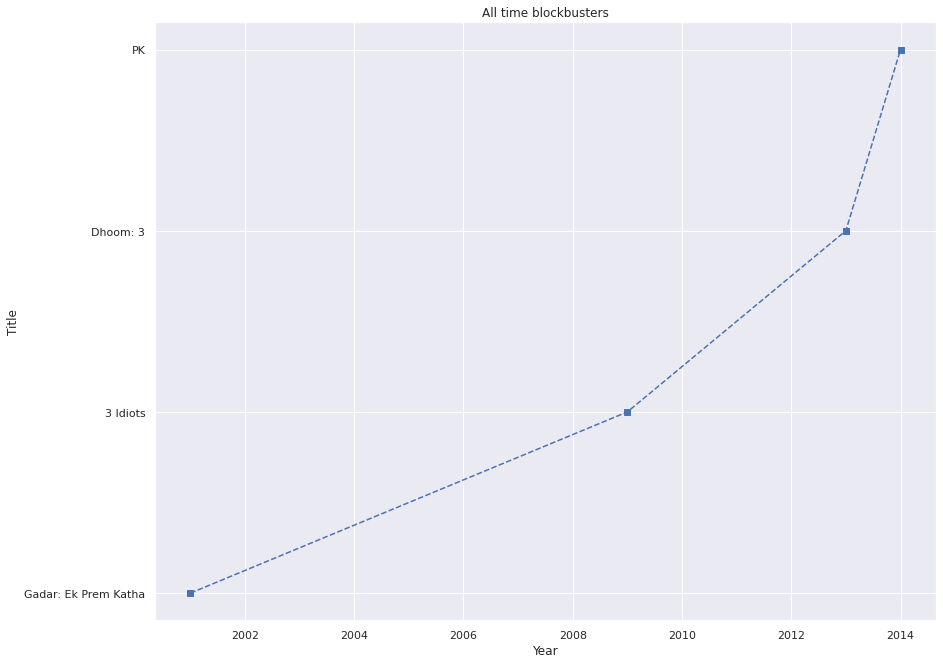

In [ ]:
plt.plot(ans.releaseYear, ans.title, 's--b')

plt.xlabel('Year')
plt.ylabel('Title')

plt.title("All time blockbusters");

Here, we make an important inference with the help of the line graph,the time gap between the release of all time blockbusters keep getting reduced. the time gap between Gadar: Ek Prem Katha and 3 Idiots is comparatively huge, in comparision to the time gap between 3 Idiots and  Dhoom: 3 and the time gap was dramatically reduced in the case of PK.

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit(files=['BollywoodActorRanking.csv','BollywoodMovieDetail.csv'],project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities" on https://jovian.com
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities


'https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities'

## Inferences and Conclusion

After conducting exploratory data analysis on Bollywood top ranked actors as well as the movie  dataset, several key insights can be drawn. The trend between 2001 and 2014 can be studied to predict best actors and directors. Important questions were asked and can be used to infer new questions and subsequently, their answers.Pandas, Matplotlib, and Seaborn was used for  providing valuable insights and visualizations of the data. Pandas was used to clean and manipulate the data, Matplotlib,seaborn was used to create data visualizations.

In [ ]:
import jovian

In [ ]:
jovian.commit(files=['BollywoodActorRanking.csv','BollywoodMovieDetail.csv'],project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities" on https://jovian.com
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities


'https://jovian.com/devashish-dixit/analysis-on-the-top-ranked-bollywood-celebrities'

## References and Future Work

- **Dataset** - https://github.com/calci/bollywood-movie-dataset
- https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
- https://sparkbyexamples.com/pandas/pandas-get-cell-value-from-dataframe/#:~:text=In%20Pandas%2C%20DataFrame.loc%5B%5D,Duration%20column%20(3rd%20column).&text=Copy-,Yields%20below%20output.,'%5D%20returns%20a%20pandas%20Series.
- https://www.geeksforgeeks.org/python-pandas-series-tolist/
- https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/
- https://www.statology.org/seaborn-pie-chart/#:~:text=Seaborn%20Color%20Palette-,The%20following%20code%20shows%20how%20to%20create%20a%20pie%20chart,palette%20to%20use%20colors%20%3D%20sns.
- https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column
- https://www.geeksforgeeks.org/how-to-add-a-title-to-seaborn-plots/


### Future work
- EDA on Movies & TV Shows available on OTT platforms
- Movie catalog  and rating System using python

In [ ]:
import jovian

In [ ]:
jovian.commit(files=['BollywoodActorRanking.csv','BollywoodMovieDetail.csv'],project=project_name)

<IPython.core.display.Javascript object>